In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import shutil
from PIL import Image
import pandas as pd
import zipfile
from zipfile import ZipFile
from io import BytesIO
from PIL import Image
from google.colab import drive
import glob


import os
print(os.getcwd())



/content


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/default_configs.db
/content/.config/config_sentinel
/content/.config/logs/2024.06.20/18.45.34.766844.log
/content/.config/logs/2024.06.20/18.44.51.925580.log
/content/.config/logs/2024.06.20/18.45.46.131261.log
/content/.config/logs/2024.06.20/18.45.16.088421.log
/content/.config/logs/2024.06.20/18.45.46.750529.log
/content/.config/logs/2024.06.20/18.45.26.499835.log
/content/.config/configurations/config_default
/content/drive/MyDrive/ВЛР I семестр.zip
/content/drive/MyDrive/Лабараторная работа 28 Чеботарев Рт-1.doc
/content/drive/MyDrive/Лабараторная работа №9 РТ-1 К. В. Чеботарев.zip
/content/drive/MyDrive/Конспект 8 Чеботарев  РТ-1.zip
/content/drive/MyDrive/Лабараторная работа 28 Чеботарев Рт-1.zip
/content/drive/MyDrive/РТ-1 Чеботарев ИДЗ-1.7z
/content/drive/MyDrive/РТ-1 Чеботарев ИДЗ-2.7z

In [ ]:
#path_to_zip_file = '/content/drive/My Drive/Proj_Data.zip'
# Создайте директорию, куда будет распакован архив
#directory_to_extract_to = '/content/drive/My Drive/extracted_images'
#os.makedirs(directory_to_extract_to, exist_ok=True)
# Распакуйте архив
#with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  #zip_ref.extractall(directory_to_extract_to)

In [ ]:
classes = [ 'Amarant', 'Cabbage', 'Watercress']
directory_to_extract_to = '/content/drive/My Drive/extracted_images'
image_df = pd.DataFrame(columns = ['X','y'])
images_set = []
for e in classes:
  dir = directory_to_extract_to  + f'/{e}'
  # Получите список всех файлов изображений в директории
  images_path = glob.glob(dir + '/*.jpg') # Или другой формат изображения
  # Считайте изображения
  images = [Image.open(img_path) for img_path in images_path]

  images_set.append(images)

In [ ]:
print(images_set)

[[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x787313507F70>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x787313507DC0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x7872D9A93280>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x7872D9A93340>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x7872D9A93670>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x7872D9A93940>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x7872D9A93C10>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x7872D9A93EE0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x7872D9ABC1F0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x7872D9ABC4C0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x7872D9ABC790>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x302

In [ ]:
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        # Проходим по всем файлам в архиве


/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/default_configs.db
/content/.config/config_sentinel
/content/.config/logs/2024.06.20/18.45.34.766844.log
/content/.config/logs/2024.06.20/18.44.51.925580.log
/content/.config/logs/2024.06.20/18.45.46.131261.log
/content/.config/logs/2024.06.20/18.45.16.088421.log
/content/.config/logs/2024.06.20/18.45.46.750529.log
/content/.config/logs/2024.06.20/18.45.26.499835.log
/content/.config/configurations/config_default
/content/drive/MyDrive/ВЛР I семестр.zip
/content/drive/MyDrive/Лабараторная работа 28 Чеботарев Рт-1.doc
/content/drive/MyDrive/Лабараторная работа №9 РТ-1 К. В. Чеботарев.zip
/content/drive/MyDrive/Конспект 8 Чеботарев  РТ-1.zip
/content/drive/MyDrive/Лабараторная работа 28 Чеботарев Рт-1.zip
/content/drive/MyDrive/РТ-1 Чеботарев ИДЗ-1.7z
/content/drive/MyDrive/РТ-1 Чеботарев ИДЗ-2.7z

In [ ]:






#cv2_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
#image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
#image_pillow = Image.fromarray(image_rgb)
def crop_img(image_CV2, size_x, size_y):
    image = image_CV2

    # Получение размеров изображения
    height, width = image.shape[:2]

    # Определение размера центральной части
    center_x, center_y = height // 2, width // 2

    crop_size_x = (size_x // 224 - 0) * 224
    crop_size_y = (size_y // 224 - 0) * 224

    # Определение координат для обрезки
    x1, y1 = center_x - crop_size_x // 2, center_y - crop_size_y // 2
    x2, y2 = center_x + crop_size_x // 2, center_y + crop_size_y // 2

    # Вырезание центральной части изображения
    cropped_image = image[y1:y2, x1:x2]
    return cropped_image


#img_dirs = ['C:/Proj_Data/Amarant', 'C:/Proj_Data/Cabbage', 'C:/Proj_Data/Watercress']

def slice_image(image_PIL, chunk_size, tmp_set):
    image = image_PIL
    width, height = image.size

    for x in range(0, width, chunk_size):
        for y in range(0, height, chunk_size):
            box = (x, y, x + chunk_size, y + chunk_size)
            region = image.crop(box)
            #region.save(f'chunk_{x}_{y}.png')
            tmp_set.append(region)


chunk_size = 224
#slice_image(image_path, chunk_size)



# Задаем путь к директории, в которой будут создаваться папки
output_path = "C:/Proj_Data/data"



# Создание папок с названиями классов





In [ ]:
images_set_2 = []
for img_set in images_set:
  tmp_set = []
  for img in img_set:
    tmp = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    height, width, chans = tmp.shape
    image = crop_img(tmp, height, width)
    tmp_set.append(image)
  images_set_2.append(tmp_set)
images_set = []

In [ ]:
print(images_set_2)

[[array([[[109, 110, 130],
        [108, 109, 129],
        [108, 109, 129],
        ...,
        [103,  87,  81],
        [105,  89,  83],
        [103,  87,  81]],

       [[111, 112, 132],
        [110, 111, 131],
        [109, 110, 130],
        ...,
        [ 97,  81,  75],
        [113,  97,  91],
        [118, 102,  96]],

       [[113, 114, 134],
        [112, 113, 133],
        [112, 113, 133],
        ...,
        [128, 112, 106],
        [131, 115, 109],
        [114,  98,  92]],

       ...,

       [[194, 210, 216],
        [194, 210, 216],
        [194, 210, 216],
        ...,
        [213, 226, 228],
        [214, 227, 229],
        [215, 228, 230]],

       [[195, 211, 217],
        [194, 210, 216],
        [194, 210, 216],
        ...,
        [213, 226, 228],
        [213, 226, 228],
        [214, 227, 229]],

       [[195, 211, 217],
        [194, 210, 216],
        [194, 210, 216],
        ...,
        [212, 225, 227],
        [213, 226, 228],
        [214, 227, 229

In [ ]:
images_set_3 = []
for img_set in images_set_2:
  tmp_set = []
  for img in img_set:
    tmp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_pillow = Image.fromarray(tmp)
    slice_image(image_pillow, 224, tmp_set)
  print(len(tmp_set))
  while(len(tmp_set) < 3270):
    tmp_set = tmp_set + tmp_set
  images_set_3.append(tmp_set[0: 512])
images_set_2 = []

19838
1978
912


In [ ]:
for akd in images_set_3:
  print(len(akd))

512
512
512


In [ ]:
print(images_set_3)

[[<PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABCDC0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABC1F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABCEB0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABCCD0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABCF40>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABC9D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABC910>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABCA00>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABCE20>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABCA30>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABC7C0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABC4F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABCAC0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABDE70>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7872D9ABDDE0>, <PIL.Image.Image image 

In [ ]:
images_set_4 = []
for img_set in images_set_3:
  tmp_set = []
  for img in img_set:
    tmp = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    tmp_set.append(tmp)
  images_set_4.append(tmp_set)
images_set_3 = []

In [ ]:
#img_df = pd.DataFrame(data = images_set_3, columns = classes)
list_x = []
list_y = []
for i in range(3):
   list_x = list_x + images_set_4[i]
   list_y = list_y + [i for j in range(512)]
print(list_y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(image_df)

Empty DataFrame
Columns: [X, y]
Index: []


In [ ]:
final_df = pd.DataFrame({'X': list_x, 'y': list_y})

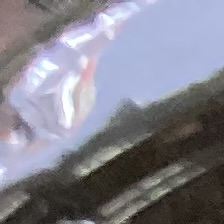

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(final_df['X'][0])

In [ ]:
print(final_df['X'])

0       [[[109, 110, 130], [108, 109, 129], [108, 109,...
1       [[[61, 64, 69], [61, 64, 69], [34, 38, 43], [4...
2       [[[33, 41, 48], [40, 48, 55], [28, 36, 43], [2...
3       [[[1, 7, 12], [4, 10, 15], [3, 9, 14], [12, 18...
4       [[[7, 13, 18], [21, 27, 32], [20, 26, 31], [20...
                              ...                        
1531    [[[33, 95, 131], [56, 126, 149], [55, 129, 147...
1532    [[[32, 64, 129], [31, 66, 129], [30, 65, 128],...
1533    [[[32, 132, 150], [23, 123, 141], [18, 116, 13...
1534    [[[28, 107, 128], [28, 110, 128], [26, 110, 12...
1535    [[[41, 106, 134], [36, 101, 129], [30, 97, 124...
Name: X, Length: 1536, dtype: object


In [ ]:
!pip install tensorflow


In [ ]:
def map_f(x):
  return np.array(x)

x = list(map(map_f,  final_df['X'].to_list()))
#final_df['X'].map(map_f, )
y = final_df['y']
print(len(y))

1536


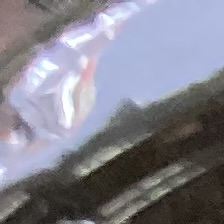

In [ ]:
cv2_imshow(x[0])

In [ ]:
for dirname, _, filenames in os.walk('/content/images_2'):
    for filename in filenames:
        os.remove(f'{dirname}/{filename}' )

In [ ]:

imgs_dir = '/content/images_2'
os.makedirs(imgs_dir, exist_ok=True)
for dir in classes:
  os.makedirs(f'{imgs_dir}/{dir}', exist_ok=True)


In [ ]:
for i in range(3):
  for j in range(len(images_set_4[i])):
    cv2.imwrite(f'/content/images_2/{classes[i]}/{j}.jpg', images_set_4[i][j])


In [ ]:
for dirname, _, filenames in os.walk('/content/images_2'):
  for filename in filenames:
    print(f'{dirname}/{filename}')

/content/images_2/Amarant/429.jpg
/content/images_2/Amarant/374.jpg
/content/images_2/Amarant/299.jpg
/content/images_2/Amarant/333.jpg
/content/images_2/Amarant/29.jpg
/content/images_2/Amarant/71.jpg
/content/images_2/Amarant/506.jpg
/content/images_2/Amarant/306.jpg
/content/images_2/Amarant/80.jpg
/content/images_2/Amarant/100.jpg
/content/images_2/Amarant/505.jpg
/content/images_2/Amarant/153.jpg
/content/images_2/Amarant/335.jpg
/content/images_2/Amarant/381.jpg
/content/images_2/Amarant/444.jpg
/content/images_2/Amarant/353.jpg
/content/images_2/Amarant/252.jpg
/content/images_2/Amarant/496.jpg
/content/images_2/Amarant/54.jpg
/content/images_2/Amarant/231.jpg
/content/images_2/Amarant/294.jpg
/content/images_2/Amarant/327.jpg
/content/images_2/Amarant/226.jpg
/content/images_2/Amarant/145.jpg
/content/images_2/Amarant/369.jpg
/content/images_2/Amarant/206.jpg
/content/images_2/Amarant/427.jpg
/content/images_2/Amarant/82.jpg
/content/images_2/Amarant/119.jpg
/content/images_2/A

In [ ]:
from re import X
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Каталог с набором данных
data_dir = '/content/images_2'

tf.compat.v1.disable_eager_execution()

early_stop = EarlyStopping(
    monitor='val_loss',  # Метрика для отслеживания
    patience=5,  # Количество эпох для ожидания улучшения
    verbose=1,  # Вывод информации в консоль
    mode='min',  # Режим (min для минимизации метрики)
    restore_best_weights=True
)

callbacks_list = [EarlyStopping(monitor='vasl_loss', patience=5,verbose=1,  restore_best_weights=True)]

classes = [ 'Amarant', 'Cabbage', 'Watercress']

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 )

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Режим классификации
    classes = classes,
    subset='training')

test_data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Размер изображений
    batch_size=32,  # Размер пакета
    class_mode='categorical',  # Режим классификации
    classes = classes,
    subset='validation'  # Определение тестовой выборки
)

class_indices = train_generator.class_indices

print(class_indices)

class_indices = test_data_generator.class_indices

print(class_indices)

file_paths = train_generator.filepaths
for path in file_paths:
    if '.ipynb_checkpoints' in path:
       print(path)

#y = y_train_cat = keras.utils.to_categorical(y, 3)

#img_dirs = ['C:/Proj_Data/Amarant', 'C:/Proj_Data/Cabbage', 'C:/Proj_Data/Watercress']

#X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, random_state=0)

#X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, random_state=0)

#x_train = x_train / 255
#x_test = x_test / 255

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax')) #sigmoid

model.summary()

model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

#model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))
history = model.fit(
    train_generator,
    #steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    #validation_split = 0.2,
    validation_data=test_data_generator,
    #validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stop]
    )
#model.save('proj.h5')
model.evaluate(test_data_generator, verbose = 1)

Found 1230 images belonging to 3 classes.
Found 306 images belonging to 3 classes.
{'Amarant': 0, 'Cabbage': 1, 'Watercress': 2}
{'Amarant': 0, 'Cabbage': 1, 'Watercress': 2}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Co

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


39/39 [==============================] - 179s 4s/step - batch: 19.0000 - size: 31.5385 - loss: 1.1597 - accuracy: 0.6415 - val_loss: 0.3168 - val_accuracy: 0.8595
Epoch 2/50
39/39 [==============================] - 166s 4s/step - batch: 19.0000 - size: 31.5385 - loss: 0.3557 - accuracy: 0.8366 - val_loss: 0.2342 - val_accuracy: 0.8922
Epoch 3/50
39/39 [==============================] - 168s 4s/step - batch: 19.0000 - size: 31.5385 - loss: 0.2447 - accuracy: 0.8878 - val_loss: 0.1652 - val_accuracy: 0.9379
Epoch 4/50
39/39 [==============================] - 172s 4s/step - batch: 19.0000 - size: 31.5385 - loss: 0.1555 - accuracy: 0.9398 - val_loss: 0.1733 - val_accuracy: 0.9150
Epoch 5/50
39/39 [==============================] - 166s 4s/step - batch: 19.0000 - size: 31.5385 - loss: 0.1083 - accuracy: 0.9537 - val_loss: 0.1155 - val_accuracy: 0.9575
Epoch 6/50
39/39 [==============================] - 168s 4s/step - batch: 19.0000 - size: 31.5385 - loss: 0.0868 - accuracy: 0.9667 - val_los

[0.0755528968758881, 0.9738562]

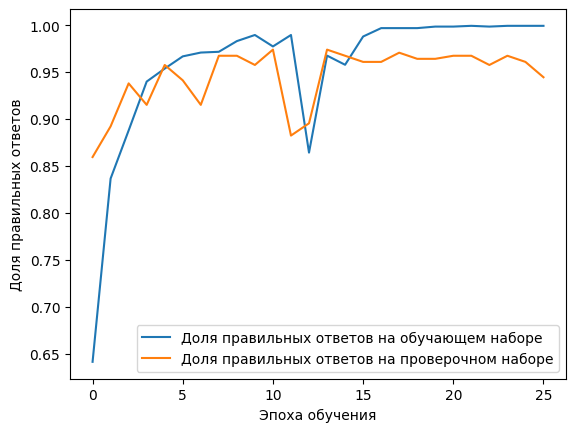

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [ ]:
tf.compat.v1.saved_model.save(model, '/content/drive/My Drive/saved_model_4')
model.save('/content/proj_v5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('proj_v2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>